In [92]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()

In [93]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

In [94]:
df = pd.read_csv('the-counted-2015.csv')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 14 columns):
uid                     1146 non-null int64
name                    1146 non-null object
age                     1146 non-null object
gender                  1146 non-null object
raceethnicity           1146 non-null object
month                   1146 non-null object
day                     1146 non-null int64
year                    1146 non-null int64
streetaddress           1140 non-null object
city                    1146 non-null object
state                   1146 non-null object
classification          1146 non-null object
lawenforcementagency    1146 non-null object
armed                   1146 non-null object
dtypes: int64(3), object(11)
memory usage: 125.4+ KB


In [96]:
df.head(2)

,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,classification,lawenforcementagency,armed
0,2,Matthew Ajibade,22,Male,Black,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,Death in custody,Chatham County Sheriff's Office,No
1,4,Lewis Lembke,47,Male,White,January,2,2015,4505 SW Masters Loop,Aloha,OR,Gunshot,Washington County Sheriff's Office,Firearm


In [97]:
df.drop(['uid','name','lawenforcementagency','streetaddress'],axis=1,inplace=True)

In [98]:
df.head(2)

,age,gender,raceethnicity,month,day,year,city,state,classification,armed
0,22,Male,Black,January,1,2015,Savannah,GA,Death in custody,No
1,47,Male,White,January,2,2015,Aloha,OR,Gunshot,Firearm


In [99]:
vc=df.drop(['age','day','year','city','state'],axis=1)

In [100]:
vc.head(2)

,gender,raceethnicity,month,classification,armed
0,Male,Black,January,Death in custody,No
1,Male,White,January,Gunshot,Firearm


Male              1093
Female              52
Non-conforming       1
Name: gender, dtype: int64

Male              0.953752
Female            0.045375
Non-conforming    0.000873
Name: gender, dtype: float64

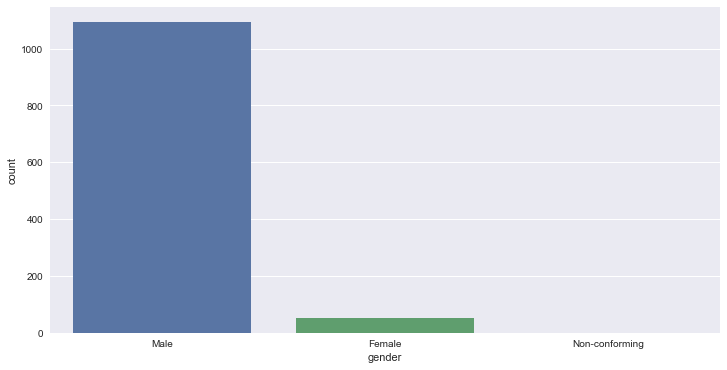

White                     584
Black                     307
Hispanic/Latino           195
Asian/Pacific Islander     24
Unknown                    18
Native American            13
Arab-American               4
Other                       1
Name: raceethnicity, dtype: int64

White                     0.509599
Black                     0.267888
Hispanic/Latino           0.170157
Asian/Pacific Islander    0.020942
Unknown                   0.015707
Native American           0.011344
Arab-American             0.003490
Other                     0.000873
Name: raceethnicity, dtype: float64

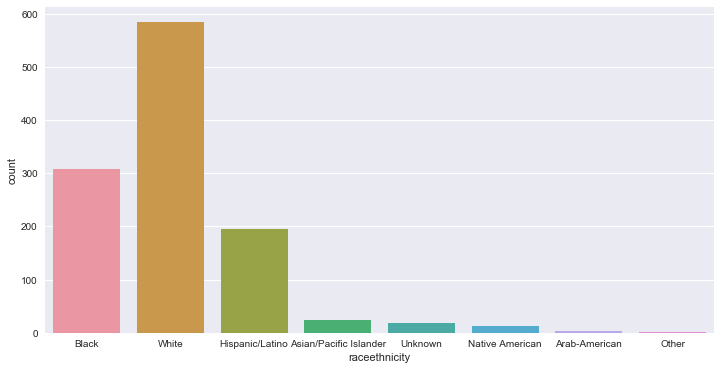

July         124
March        113
August       102
April        102
September     97
December      93
January       91
October       91
May           86
November      84
February      83
June          80
Name: month, dtype: int64

July         0.108202
March        0.098604
August       0.089005
April        0.089005
September    0.084642
December     0.081152
January      0.079407
October      0.079407
May          0.075044
November     0.073298
February     0.072426
June         0.069808
Name: month, dtype: float64

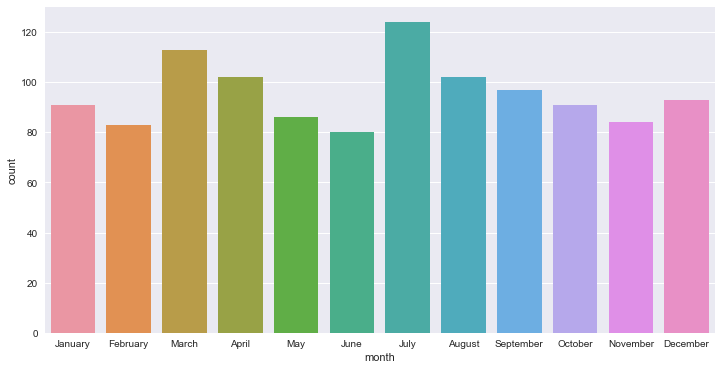

Gunshot              1017
Taser                  50
Death in custody       47
Struck by vehicle      31
Other                   1
Name: classification, dtype: int64

Gunshot              0.887435
Taser                0.043630
Death in custody     0.041012
Struck by vehicle    0.027051
Other                0.000873
Name: classification, dtype: float64

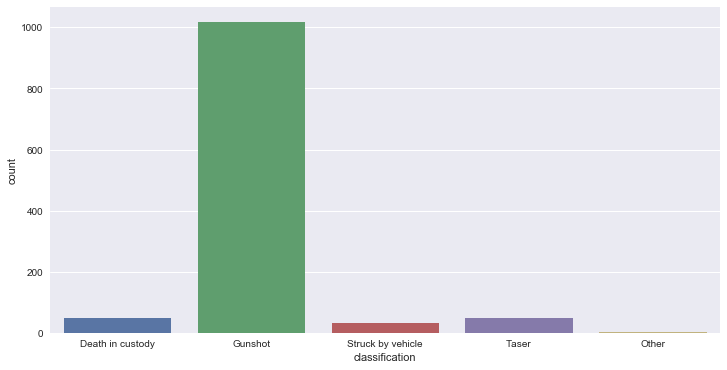

Firearm               554
No                    235
Knife                 152
Other                  64
Non-lethal firearm     47
Unknown                45
Vehicle                44
Disputed                5
Name: armed, dtype: int64

Firearm               0.483421
No                    0.205061
Knife                 0.132635
Other                 0.055846
Non-lethal firearm    0.041012
Unknown               0.039267
Vehicle               0.038394
Disputed              0.004363
Name: armed, dtype: float64

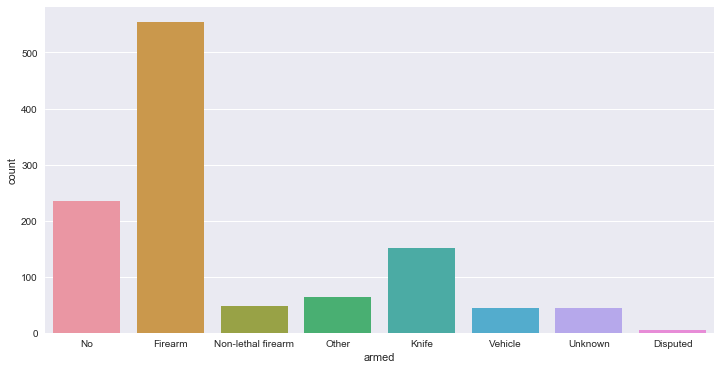

In [126]:
for col in list(vc.columns):
    df[col].value_counts()
    df[col].value_counts(normalize=True)
    sns.countplot(df[col])
    plt.show()

What did we learn?
95% male

White                     0.509599
Black                     0.267888
Hispanic/Latino           0.170157

Firearm               0.483421
No                    0.205061
Knife                 0.132635

Blacks account for only 12.3% of the US population and are involved in 26.8% of police shootings

-----------------------------------------------   Second degree analysis   --------------------------------------------------

What percent of blacks had guns? What percent of whites had guns?

In [109]:
df[df['armed']=='Firearm']['raceethnicity'].value_counts()

White                     306
Black                     140
Hispanic/Latino            83
Unknown                     9
Asian/Pacific Islander      9
Native American             5
Other                       1
Arab-American               1
Name: raceethnicity, dtype: int64

In [114]:
'{} % of blacks had guns'.format(round(100*140/307,2))

'45.6 % of blacks had guns'

In [117]:
'{} % of whites had guns'.format(round(100*306/584,2))

'52.4 % of whites had guns'

So whites were armed more often than blacks

Let's look at unarmed whites and blacks